<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --upgrade numpy pandas

import pandas as pd
import numpy as np
# Load dataset
df = pd.read_csv('/content/adult_with_headers.csv')

# Display basic info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))


Shape of dataset: (32561, 15)

Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Summary Statistics:
                  age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            Na

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_cols] = standard_scaler.fit_transform(df[num_cols])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df[num_cols])


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# One-Hot Encoding (for features with <5 categories)
one_hot_cols = [col for col in df_encoded.select_dtypes(include='object').columns if df_encoded[col].nunique() < 5]
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)

# Label Encoding (for features with >=5 categories)
label_cols = [col for col in df_encoded.select_dtypes(include='object').columns]
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
# Feature 1: Age group (bucketed age ranges)
df_encoded['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Senior', 'Elder'])

# Feature 2: Capital Gain Indicator (binary)
df_encoded['has_capital_gain'] = (df['capital_gain'] > 0).astype(int)

# Log transformation on skewed feature
import numpy as np
df_encoded['capital_gain_log'] = df['capital_gain'].apply(lambda x: np.log1p(x))


In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to numeric features
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_encoded.select_dtypes(include=['int64', 'float64']))

# Remove outliers
df_cleaned = df_encoded[outliers == 1]
print("After removing outliers:", df_cleaned.shape)


After removing outliers: (32235, 20)


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 85.3 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=796cd2cedbf8c77711ec2cde5d170c51b3758f8704182fb0ceb8fc9310a7818b
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is 

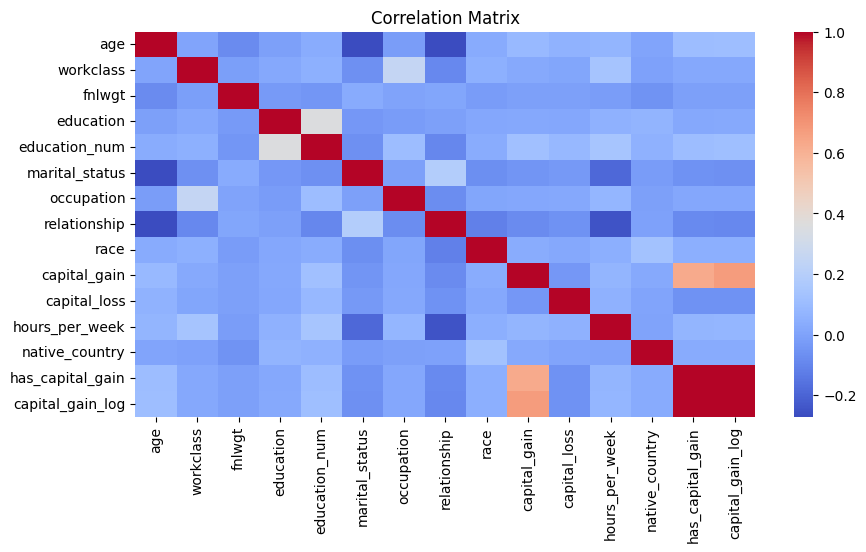

                x              y  ppscore            case  is_valid_score  \
0             age            age      1.0  predict_itself            True   
17            age      age_group      1.0  classification            True   
21      workclass      workclass      1.0  predict_itself            True   
64      education  education_num      1.0      regression            True   
42         fnlwgt         fnlwgt      1.0  predict_itself            True   
63      education      education      1.0  predict_itself            True   
147  relationship   relationship      1.0  predict_itself            True   
189  capital_gain   capital_gain      1.0  predict_itself            True   
168          race           race      1.0  predict_itself            True   
210  capital_loss   capital_loss      1.0  predict_itself            True   

                  metric  baseline_score  model_score  \
0                   None          0.0000          1.0   
17           weighted F1          0.36

In [ ]:
!pip install ppscore
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset (make sure df_cleaned exists)
# If df_cleaned is not defined, first load and preprocess the dataset

# PPS Matrix
pps_matrix = pps.matrix(df_cleaned)
pps_matrix_filtered = pps_matrix[pps_matrix['ppscore'] > 0.05]

# Correlation Matrix (only numeric columns)
numeric_df = df_cleaned.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

# View top predictive relationships
top_pps = pps_matrix_filtered.sort_values(by='ppscore', ascending=False).head(10)
print(top_pps)
